In [5]:
import pandas as pd
import numpy as np 

In [6]:
df = pd.read_csv(r"C:\Users\cmoli\OneDrive\Documentos\GitHub\Titanic\data\titanic_limpio.csv")

In [7]:
df.head(2) #leer

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tiene_cabina
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,sin datos,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


### Porcentaje de supervivientes

In [29]:
porcentaje_supervivientes = (df['Survived'].mean()) * 100
porcentaje_supervivientes

np.float64(38.38383838383838)

In [78]:
tabla_clase = df.groupby("Pclass")["Survived"].agg(["count", "mean","sum" ]) #agrupamos por clase y calculamos la media de supervivencia
tabla_clase.columns = ["Conteo", "Media", "Supervivientes"] #cambiamos el nombre de las columnas
tabla_clase = tabla_clase.sort_index() #ordenamos por índice
tabla_clase #mostramos la tabla

,Conteo,Media,Supervivientes
Pclass,,,
1,216,0.629630,136
2,184,0.472826,87
3,491,0.242363,119


### Apellido más repetidos por clase

In [84]:
# Extraer apellidos
df["Apellido"] = df['Name'].str.split(',').str[0]

# Encontrar el apellido más repetido por clase
apellido_mas_comun = df.groupby('Pclass')['Apellido'].agg(lambda x: x.mode()[0])
apellido_mas_comun



Pclass
1       Carter
2        Brown
3    Andersson
Name: Apellido, dtype: object

### Precio medio por clase

In [38]:
precio_medio_por_clase = df.groupby('Pclass')['Fare'].mean()
precio_medio_por_clase

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

### Edad media por clase

In [60]:
edad_media_por_clase = df.groupby('Pclass')['Age'].mean()
edad_media_por_clase

Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64

### Supervivientes por rangos de edad

In [61]:
supervivientes_por_rango_edad = df[df['Survived'] == 1]['RangoEdad'].value_counts()
supervivientes_por_rango_edad

RangoEdad
Adultos Jóvenes    187
Adultos             87
Niños               39
Adolescentes        22
Mayores              7
Name: count, dtype: int64

C:\Users\cmoli\AppData\Local\Temp\ipykernel_24788\2337648023.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RangoEdad', y='Supervivientes', data=supervivientes_por_rango_edad, palette='viridis')


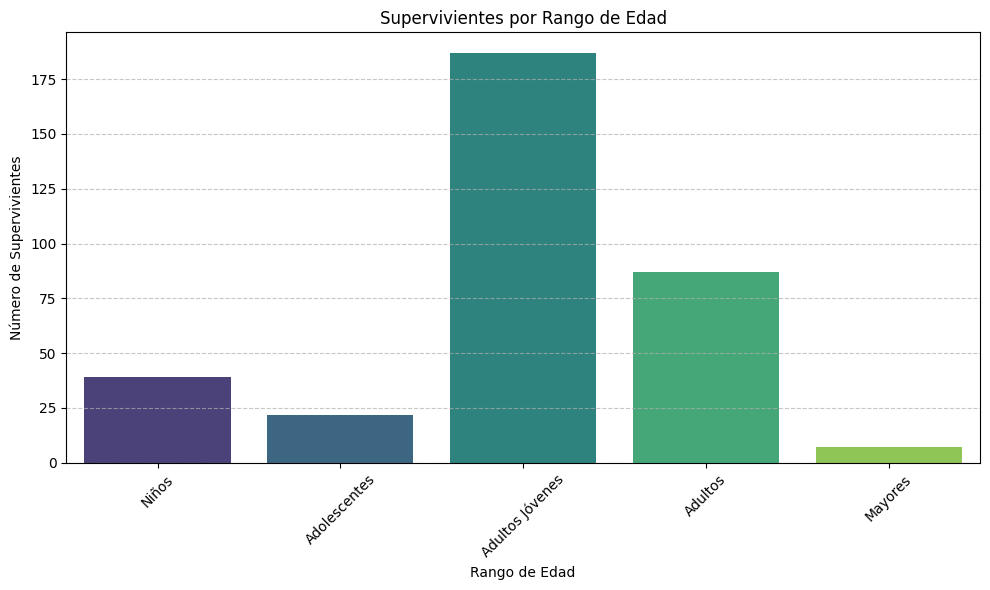

In [58]:
supervivientes_por_rango_edad = df[df['Survived'] == 1]['RangoEdad'].value_counts()
supervivientes_por_rango_edad = supervivientes_por_rango_edad.sort_index()
supervivientes_por_rango_edad = supervivientes_por_rango_edad.rename_axis('RangoEdad').reset_index(name='Supervivientes')
supervivientes_por_rango_edad['RangoEdad'] = supervivientes_por_rango_edad['RangoEdad'].astype(str)
# Crear un gráfico de barras
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.barplot(x='RangoEdad', y='Supervivientes', data=supervivientes_por_rango_edad, palette='viridis')
plt.title('Supervivientes por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Supervivientes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.show()
# Crear un gráfico de dispersión

### % de supervencia entre hombres, mujeres y ninos por clase

In [73]:
# Calcular el porcentaje de supervivencia por sexo y clase
porcentaje_supervivencia_sexo_clase = df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100

# Calcular el porcentaje de supervivencia para niños por clase
porcentaje_supervivencia_niños_clase = df[df['RangoEdad'] == 'Niños'].groupby('Pclass')['Survived'].mean() * 100

# Mostrar los resultados
print("Porcentaje de supervivencia por sexo y clase:")
print(porcentaje_supervivencia_sexo_clase)

print("\nPorcentaje de supervivencia de niños por clase:")
print(porcentaje_supervivencia_niños_clase)

Porcentaje de supervivencia por sexo y clase:
Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64

Porcentaje de supervivencia de niños por clase:
Pclass
1     75.000000
2    100.000000
3     40.425532
Name: Survived, dtype: float64


### Supervivientes por sexo

In [77]:
supervivientes_por_sexo = df[df['Survived'] == 1]['Sex'].value_counts()
supervivientes_por_sexo

Sex
female    233
male      109
Name: count, dtype: int64